In [5]:
# Importar librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples

In [6]:
# Visualizacion del DF entero

pd.set_option('display.max_columns', None)

# Importar datos

In [8]:
data_final = pd.read_csv("data_completa.csv")
data_final

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo,cluster,categoria
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,1982-01-05,181,55.0,Udinese,31,Serie A,LM,27,Italia,Izq,71,59,66,66,71,73,76,49,59,68,57,63,67,59,68,69,68,73,67,72,67,73,67,77,69,67,77,72,63,51,49,70,73,73,13,4,14,9,11,10,63,63,63,67,64,64,64,67,64,64,64,68,67,67,67,68,71,69,69,69,71,72,70,70,70,72,13,udinese calcio,2015.0,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97,2,Estrellas
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,1981-10-02,183,68.0,Metz,16,Ligue 1,RDM,18,Francia,Dch,52,62,69,68,56,69,64,54,60,73,61,65,69,49,69,73,53,52,74,68,63,72,70,54,79,71,63,63,64,72,65,46,59,57,6,7,10,7,12,8,63,63,63,66,66,66,66,66,69,69,69,66,68,68,68,66,62,65,65,65,62,60,62,62,62,60,12,fc metz,2015.0,16.0,ligue 1,18.0,francia,69.0,70.0,70.0,68.0,27.91,24.47,2,Estrellas
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,1981-11-08,176,2.0,Aston Villa,13,Premier League,SUB,14,Inglaterra,Dch,60,70,78,80,36,55,81,69,52,79,75,80,83,76,68,82,62,59,77,72,82,72,58,33,60,71,68,38,72,81,65,34,33,29,8,5,12,15,6,9,70,70,70,76,72,72,72,76,76,76,76,74,68,68,68,74,56,59,59,59,56,50,48,48,48,50,12,aston villa,2015.0,13.0,premier league,14.0,inglaterra,74.0,76.0,74.0,73.0,26.00,24.64,2,Estrellas
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,1981-09-29,180,468.0,Elche,53,La Liga 2,SUB,45,Espana,Izq,36,38,40,45,48,48,25,25,25,21,25,25,25,25,22,34,41,49,55,66,60,30,78,32,60,25,36,25,25,25,25,25,25,25,75,74,68,77,80,45,33,33,33,32,32,32,32,32,31,31,31,31,29,29,29,31,31,32,32,32,31,31,34,34,34,31,76,elche cf,2015.0,53.0,la liga 2,45.0,espana,72.0,72.0,71.0,72.0,25.91,24.62,3,Otros
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,1984-05-11,170,241.0,FC Barcelona,53,La Liga,LCM,45,Espana,Dch,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,57,57,56,6,13,6,13,7,9,77,77,77,87,82,82,82,87,88,88,88,88,86,86,86,88,76,77,77,77,76,70,63,63,63,70,14,fc barcelona,2015.0,53.0,la liga,45.0,espana,84.0,87.0,84.0,81.0,27.27,25.72,2,Estrellas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,2002-12-02,174,113057.0,Al Fayha,350,Pro League,RES,183,Arabia Saudita,Dch,66,34,44,49,54,63,37,30,48,50,33,47,32,37,49,45,62,69,59,46,75,49,56,74,60,28,57,52,33,43,35,55,57,56,13,12,6,8,5,8,44,44,44,45,44,44,44,45,45,45,45,47,47,47,47,47,53,53,53,53,53,54,54,54,54,54,13,al fayha,2018.0,350.0,pro league,183.0,arabia saudita,66.0,66.0,67.0,61.0,26.36,26.82,1,Secundarios
180017,278138,Josh 

In [11]:
data_inicial=pd.read_csv("datas.csv")
data_inicial

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,1982-01-05,181,55.0,Udinese,31,Serie A,LM,27,Italia,Izq,71,59,66,66,71,73,76,49,59,68,57,63,67,59,68,69,68,73,67,72,67,73,67,77,69,67,77,72,63,51,49,70,73,73,13,4,14,9,11,10,63,63,63,67,64,64,64,67,64,64,64,68,67,67,67,68,71,69,69,69,71,72,70,70,70,72,13,udinese calcio,2015.0,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,1981-10-02,183,68.0,Metz,16,Ligue 1,RDM,18,Francia,Dch,52,62,69,68,56,69,64,54,60,73,61,65,69,49,69,73,53,52,74,68,63,72,70,54,79,71,63,63,64,72,65,46,59,57,6,7,10,7,12,8,63,63,63,66,66,66,66,66,69,69,69,66,68,68,68,66,62,65,65,65,62,60,62,62,62,60,12,fc metz,2015.0,16.0,ligue 1,18.0,francia,69.0,70.0,70.0,68.0,27.91,24.47
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,1981-11-08,176,2.0,Aston Villa,13,Premier League,SUB,14,Inglaterra,Dch,60,70,78,80,36,55,81,69,52,79,75,80,83,76,68,82,62,59,77,72,82,72,58,33,60,71,68,38,72,81,65,34,33,29,8,5,12,15,6,9,70,70,70,76,72,72,72,76,76,76,76,74,68,68,68,74,56,59,59,59,56,50,48,48,48,50,12,aston villa,2015.0,13.0,premier league,14.0,inglaterra,74.0,76.0,74.0,73.0,26.00,24.64
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,1981-09-29,180,468.0,Elche,53,La Liga 2,SUB,45,Espana,Izq,36,38,40,45,48,48,25,25,25,21,25,25,25,25,22,34,41,49,55,66,60,30,78,32,60,25,36,25,25,25,25,25,25,25,75,74,68,77,80,45,33,33,33,32,32,32,32,32,31,31,31,31,29,29,29,31,31,32,32,32,31,31,34,34,34,31,76,elche cf,2015.0,53.0,la liga 2,45.0,espana,72.0,72.0,71.0,72.0,25.91,24.62
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,1984-05-11,170,241.0,FC Barcelona,53,La Liga,LCM,45,Espana,Dch,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,57,57,56,6,13,6,13,7,9,77,77,77,87,82,82,82,87,88,88,88,88,86,86,86,88,76,77,77,77,76,70,63,63,63,70,14,fc barcelona,2015.0,53.0,la liga,45.0,espana,84.0,87.0,84.0,81.0,27.27,25.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,2002-12-02,174,113057.0,Al Fayha,350,Pro League,RES,183,Arabia Saudita,Dch,66,34,44,49,54,63,37,30,48,50,33,47,32,37,49,45,62,69,59,46,75,49,56,74,60,28,57,52,33,43,35,55,57,56,13,12,6,8,5,8,44,44,44,45,44,44,44,45,45,45,45,47,47,47,47,47,53,53,53,53,53,54,54,54,54,54,13,al fayha,2018.0,350.0,pro league,183.0,arabia saudita,66.0,66.0,67.0,61.0,26.36,26.82
180017,278138,Josh Keyes,2024,MEC,51,130000,500,17,2006-04-26,178,1934.0,Swindon Town,61,League Two,RES,14,Inglater

In [16]:
data_filtrada = data_final.loc[data_final["categoria"] == "Estrellas"]
data_filtrada

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo,cluster,categoria
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,1982-01-05,181,55.0,Udinese,31,Serie A,LM,27,Italia,Izq,71,59,66,66,71,73,76,49,59,68,57,63,67,59,68,69,68,73,67,72,67,73,67,77,69,67,77,72,63,51,49,70,73,73,13,4,14,9,11,10,63,63,63,67,64,64,64,67,64,64,64,68,67,67,67,68,71,69,69,69,71,72,70,70,70,72,13,udinese calcio,2015.0,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97,2,Estrellas
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,1981-10-02,183,68.0,Metz,16,Ligue 1,RDM,18,Francia,Dch,52,62,69,68,56,69,64,54,60,73,61,65,69,49,69,73,53,52,74,68,63,72,70,54,79,71,63,63,64,72,65,46,59,57,6,7,10,7,12,8,63,63,63,66,66,66,66,66,69,69,69,66,68,68,68,66,62,65,65,65,62,60,62,62,62,60,12,fc metz,2015.0,16.0,ligue 1,18.0,francia,69.0,70.0,70.0,68.0,27.91,24.47,2,Estrellas
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,1981-11-08,176,2.0,Aston Villa,13,Premier League,SUB,14,Inglaterra,Dch,60,70,78,80,36,55,81,69,52,79,75,80,83,76,68,82,62,59,77,72,82,72,58,33,60,71,68,38,72,81,65,34,33,29,8,5,12,15,6,9,70,70,70,76,72,72,72,76,76,76,76,74,68,68,68,74,56,59,59,59,56,50,48,48,48,50,12,aston villa,2015.0,13.0,premier league,14.0,inglaterra,74.0,76.0,74.0,73.0,26.00,24.64,2,Estrellas
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,1984-05-11,170,241.0,FC Barcelona,53,La Liga,LCM,45,Espana,Dch,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,57,57,56,6,13,6,13,7,9,77,77,77,87,82,82,82,87,88,88,88,88,86,86,86,88,76,77,77,77,76,70,63,63,63,70,14,fc barcelona,2015.0,53.0,la liga,45.0,espana,84.0,87.0,84.0,81.0,27.27,25.72,2,Estrellas
6,58,Guy Demel,2015,LAD,70,700000,15000,33,1981-06-13,188,19.0,West Ham United,13,Premier League,RB,108,Costa de Marfil,Dch,59,42,62,66,73,77,68,21,66,63,54,71,51,41,65,68,55,63,41,63,56,73,62,69,84,47,75,72,55,58,54,73,77,74,6,12,15,7,6,9,55,55,55,61,57,57,57,61,59,59,59,64,64,64,64,64,69,69,69,69,69,70,73,73,73,70,11,west ham united,2015.0,13.0,premier league,14.0,inglaterra,75.0,73.0,74.0,72.0,26.27,24.91,2,Estrellas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179940,278020,Matias Galarza Fonda,2024,"MEC, MCO",63,1100000,2000,21,2002-02-11,175,112670.0,Talleres Cordoba,353,Liga Profesional,RES,58,Paraguay,Izq,64,58,63,62,54,48,51,57,50,70,50,62,57,51,68,65,61,67,51,60,78,62,50,50,46,60,51,56,62,64,54,48,58,61,14,10,8,10,12,10,60,60,60,61,62,62,62,61,63,63,63,62,63,63,63,62,58,59,59,59,58,58,55,55,55,58,17,club atletico talleres,2017.0,353.0,liga profesional,52.0,argentina,66.0,69

In [7]:
data_filtrada.to_csv('Estrellas.csv', index=False)

# Gráficos

## Valor de mercado por nacionalidad y temporada

In [18]:
# Contar las nacionalidades en el grupo "Estrellas"
nacionalidades_destacadas = data_filtrada["nacionalidad"].value_counts()

# Mostrar las nacionalidades más destacadas
nacionalidades_destacadas


nacionalidad
Espana        4215
Inglaterra    3788
Argentina     3372
Brasil        3300
Francia       3128
              ... 
Jordania         1
Vietnam          1
Vanuatu          1
Pakistan         1
Indonesia        1
Name: count, Length: 158, dtype: int64

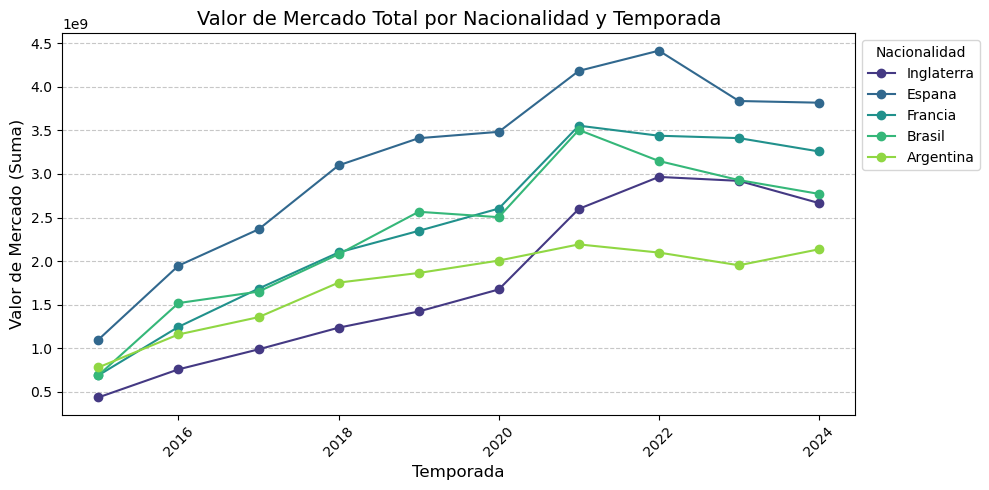

In [12]:
# Filtrar los datos por las nacionalidades seleccionadas y agrupar por 'nacionalidad' y 'version_x'
nacionalidades_seleccionadas = [
    "Inglaterra", "Espana", "Francia", "Brasil", "Argentina"
]
datos_filtrados = data_filtrada[data_filtrada['nacionalidad'].isin(nacionalidades_seleccionadas)]
datos_agrupados_por_version = datos_filtrados.groupby(['nacionalidad', 'version_x'])['valor_de_mercado'].sum().reset_index()

# Reorganizar los datos en una tabla pivote para facilitar la visualización
datos_pivoteados = datos_agrupados_por_version.pivot(index='version_x', columns='nacionalidad', values='valor_de_mercado').reindex(columns=nacionalidades_seleccionadas)

# Crear una paleta viridis con tantos colores como nacionalidades seleccionadas
viridis_palette = sns.color_palette('viridis', n_colors=len(nacionalidades_seleccionadas))

# Graficar un gráfico de líneas para cada nacionalidad
plt.figure(figsize=(10, 5))
for i, nacionalidad in enumerate(datos_pivoteados.columns):
    plt.plot(datos_pivoteados.index, datos_pivoteados[nacionalidad], marker='o', label=nacionalidad, color=viridis_palette[i])

plt.title('Valor de Mercado Total por Nacionalidad y Temporada', fontsize=14)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Valor de Mercado (Suma)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Nacionalidad', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Salario semanal por nacionalidad y temporada

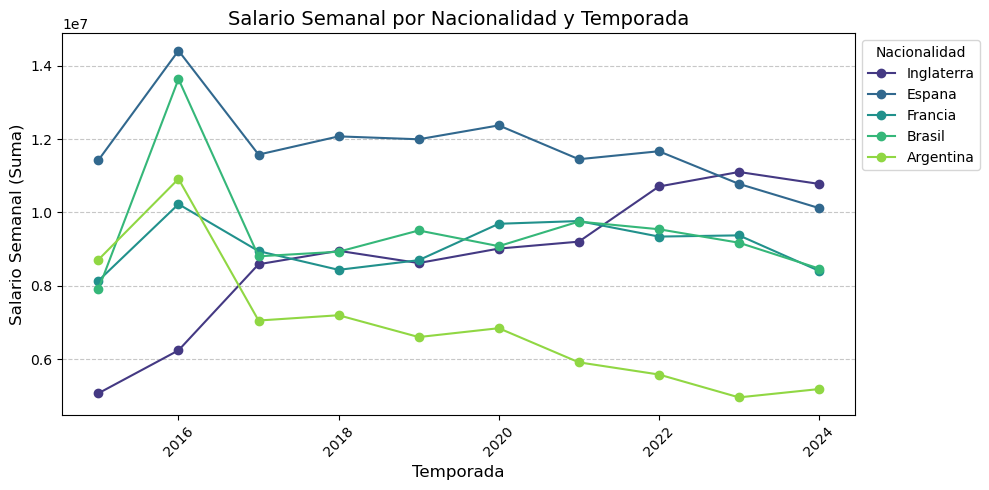

In [14]:
# Filtrar los datos por las nacionalidades seleccionadas y agrupar por 'nacionalidad' y 'version_x'
nacionalidades_seleccionadas = [
    "Inglaterra", "Espana", "Francia", "Brasil", "Argentina"
]
datos_filtrados = data_filtrada[data_filtrada['nacionalidad'].isin(nacionalidades_seleccionadas)]
datos_agrupados_por_version = datos_filtrados.groupby(['nacionalidad', 'version_x'])['salario_semanal'].sum().reset_index()

# Reorganizar los datos en una tabla pivote para facilitar la visualización
datos_pivoteados = datos_agrupados_por_version.pivot(index='version_x', columns='nacionalidad', values='salario_semanal').reindex(columns=nacionalidades_seleccionadas)

# Crear una paleta viridis con tantos colores como nacionalidades seleccionadas
viridis_palette = sns.color_palette('viridis', n_colors=len(nacionalidades_seleccionadas))

# Graficar un gráfico de líneas para cada nacionalidad
plt.figure(figsize=(10, 5))
for i, nacionalidad in enumerate(datos_pivoteados.columns):
    plt.plot(datos_pivoteados.index, datos_pivoteados[nacionalidad], 
             marker='o', label=nacionalidad, color=viridis_palette[i])

# Títulos y etiquetas
plt.title('Salario Semanal por Nacionalidad y Temporada', fontsize=14)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Salario Semanal (Suma)', fontsize=12)
plt.xticks(rotation=45)

# Leyenda
plt.legend(title='Nacionalidad', bbox_to_anchor=(1, 1), loc='upper left')

# Línea de la cuadrícula y layout ajustado
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Porcentaje de nacionalidades en ligas importantes

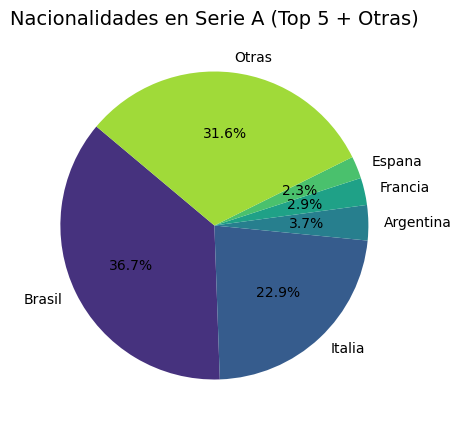

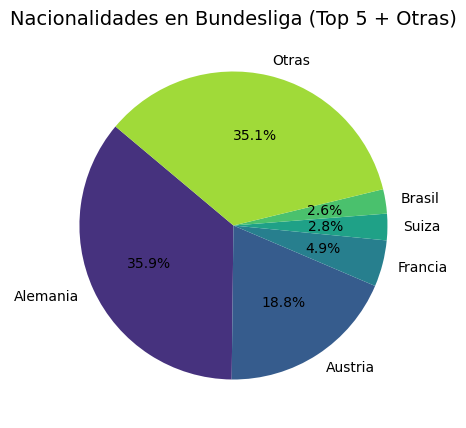

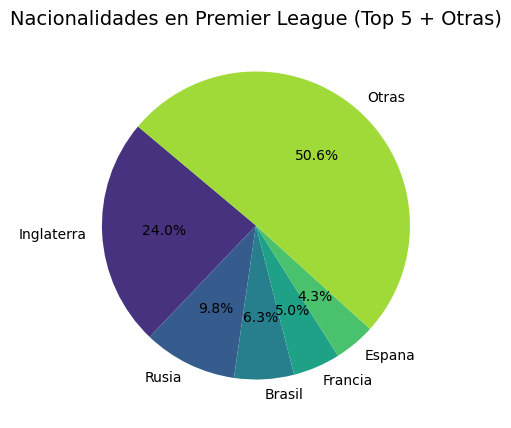

In [16]:
# Crear gráficos de sectores desde los datos originales
# Filtrar las ligas seleccionadas
ligas_filtradas_actualizadas = ["Serie A", "Bundesliga", "Premier League"]

# Agrupar los datos por liga y nacionalidad y contar la cantidad de jugadores
nacionalidades_por_liga = data_filtrada.groupby(['nombre_liga_x', 'nacionalidad']).size().reset_index(name='cantidad')

# Filtrar solo las ligas seleccionadas
nacionalidades_por_liga_filtradas = nacionalidades_por_liga[nacionalidades_por_liga['nombre_liga_x'].isin(ligas_filtradas_actualizadas)]

# Crear gráficos de sectores para cada liga
for liga in ligas_filtradas_actualizadas:
    # Filtrar los datos para la liga actual
    datos_liga = nacionalidades_por_liga_filtradas[nacionalidades_por_liga_filtradas['nombre_liga_x'] == liga]
    
    # Ordenar y seleccionar las 5 nacionalidades principales
    datos_liga = datos_liga.sort_values(by='cantidad', ascending=False)
    top_5 = datos_liga.head(5)
    otras = datos_liga.iloc[5:].sum(numeric_only=True)['cantidad']
    
    # Agregar las "Otras" nacionalidades
    labels = top_5['nacionalidad'].tolist() + ['Otras']
    sizes = top_5['cantidad'].tolist() + [otras]
    
    # Crear una paleta viridis con colores para cada segmento
    viridis_palette = sns.color_palette('viridis', n_colors=len(labels))
    
    # Crear el gráfico de sectores
    plt.figure(figsize=(5, 5))
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=viridis_palette  # Aplicar la paleta viridis
    )
    plt.title(f'Nacionalidades en {liga} (Top 5 + Otras)', fontsize=14)
    plt.show()


## Top 5 posiciones

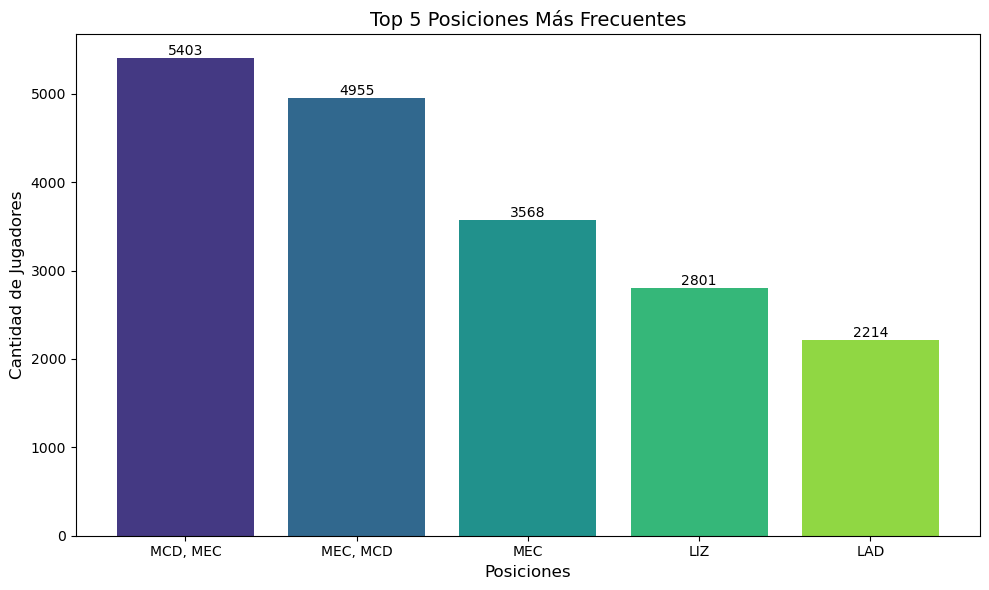

In [18]:
# Seleccionar el top 5 de valores más frecuentes en la columna "posiciones".
top_5_posiciones = data_filtrada["posiciones"].value_counts().nlargest(5)

# Crear el gráfico de barras para el top 5 utilizando la paleta viridis.
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_posiciones.index, top_5_posiciones.values, color=sns.color_palette("viridis", n_colors=5))

# Añadir título y etiquetas.
plt.title("Top 5 Posiciones Más Frecuentes", fontsize=14)
plt.xlabel("Posiciones", fontsize=12)
plt.ylabel("Cantidad de Jugadores", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Añadir etiquetas de cantidad encima de cada barra.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Mostrar el gráfico.
plt.show()



## Progresión de un jugador según su estadística general

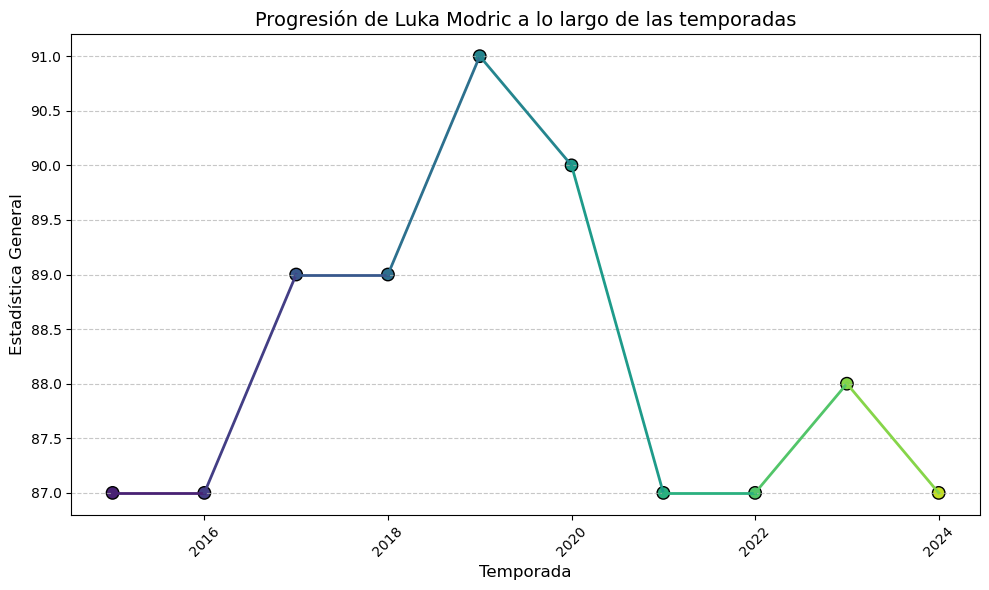

In [20]:
# Filtrar los datos nuevamente para el jugador que contiene 'Luka' y 'Modric' en su nombre
jugador_datos = data_filtrada[
    data_filtrada['nombre_jugador'].str.contains('Luka Modric', case=False, na=False)
]

# Crear un mapa de colores basado en la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=len(jugador_datos))
colors = viridis_palette

# Crear el gráfico de líneas para mostrar la progresión de Luka Modric a lo largo de las temporadas
plt.figure(figsize=(10, 6))

# Dibujar un gráfico con colores graduales para los puntos y la línea
for i in range(len(jugador_datos) - 1):
    plt.plot(
        jugador_datos['version_x'].iloc[i:i+2],
        jugador_datos['est_general_x'].iloc[i:i+2],
        color=colors[i],
        linewidth=2
    )
plt.scatter(jugador_datos['version_x'], jugador_datos['est_general_x'], color=colors, s=80, edgecolor='black')

# Títulos y etiquetas
plt.title('Progresión de Luka Modric a lo largo de las temporadas', fontsize=14)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Estadística General', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



## Top 10 jugadores "Estrella" por atributos destacables del cluster

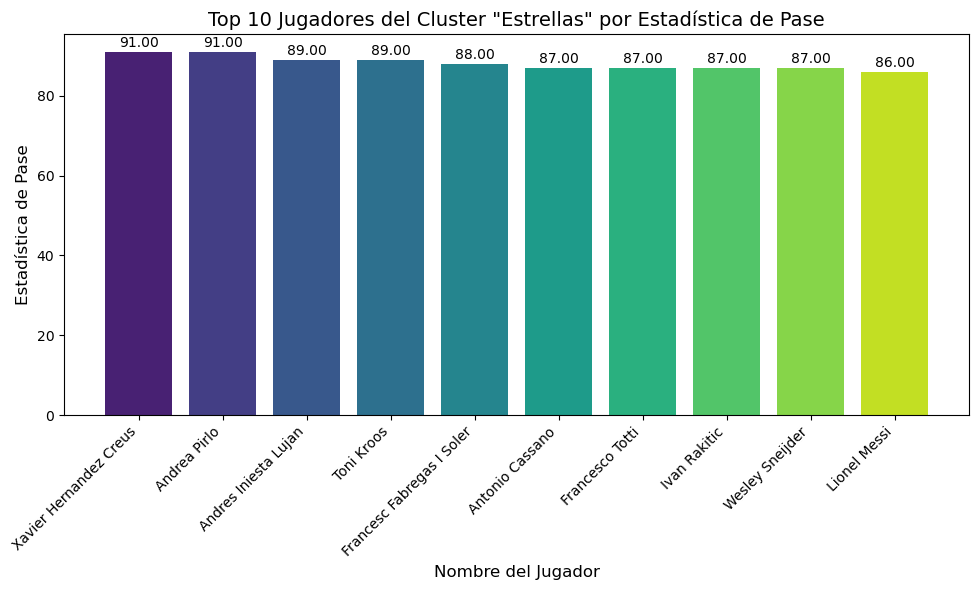

In [22]:
# Eliminar duplicados basados en la columna 'nombre_jugador', manteniendo el primero encontrado
data_filtradas = data_filtrada.drop_duplicates(subset=['nombre_jugador'])

# Asegurarnos de que no haya valores nulos en la columna 'pase' antes de ordenar
data_filtradas = data_filtradas.dropna(subset=['pase'])

# Ordenar por la estadística de pase de mayor a menor y seleccionar los 10 mejores
top_10_estrellas_pase = data_filtradas.sort_values(by="pase", ascending=False).head(10)

# Crear colores con la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_estrellas_pase['nombre_jugador'], top_10_estrellas_pase['pase'], color=viridis_palette)

# Título del gráfico
plt.title('Top 10 Jugadores del Cluster "Estrellas" por Estadística de Pase', fontsize=14)

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (valor de la estadística de pase)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posición del texto
             f'{yval:.2f}',  # Valor formateado con dos decimales
             ha='center', va='bottom', fontsize=10)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Etiquetas
plt.xlabel('Nombre del Jugador', fontsize=12)
plt.ylabel('Estadística de Pase', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




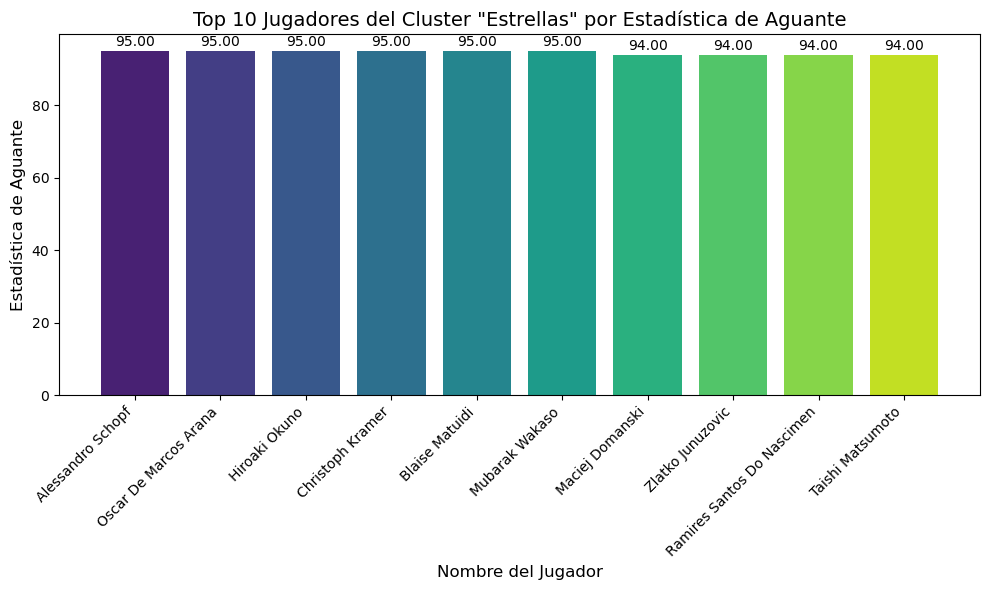

In [23]:
# Eliminar duplicados basados en la columna 'nombre_jugador', manteniendo el primero encontrado
data_filtradas = data_filtrada.drop_duplicates(subset=['nombre_jugador'])

# Asegurarnos de que no haya valores nulos en la columna 'aguante' antes de ordenar
data_filtradas = data_filtradas.dropna(subset=['aguante'])

# Ordenar por la estadística de aguante de mayor a menor y seleccionar los 10 mejores
top_10_estrellas_aguante = data_filtradas.sort_values(by="aguante", ascending=False).head(10)

# Crear colores con la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_estrellas_aguante['nombre_jugador'], top_10_estrellas_aguante['aguante'], color=viridis_palette)

# Título del gráfico
plt.title('Top 10 Jugadores del Cluster "Estrellas" por Estadística de Aguante', fontsize=14)

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (valor de la estadística de aguante)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posición del texto
             f'{yval:.2f}',  # Valor formateado con dos decimales
             ha='center', va='bottom', fontsize=10)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Etiquetas
plt.xlabel('Nombre del Jugador', fontsize=12)
plt.ylabel('Estadística de Aguante', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



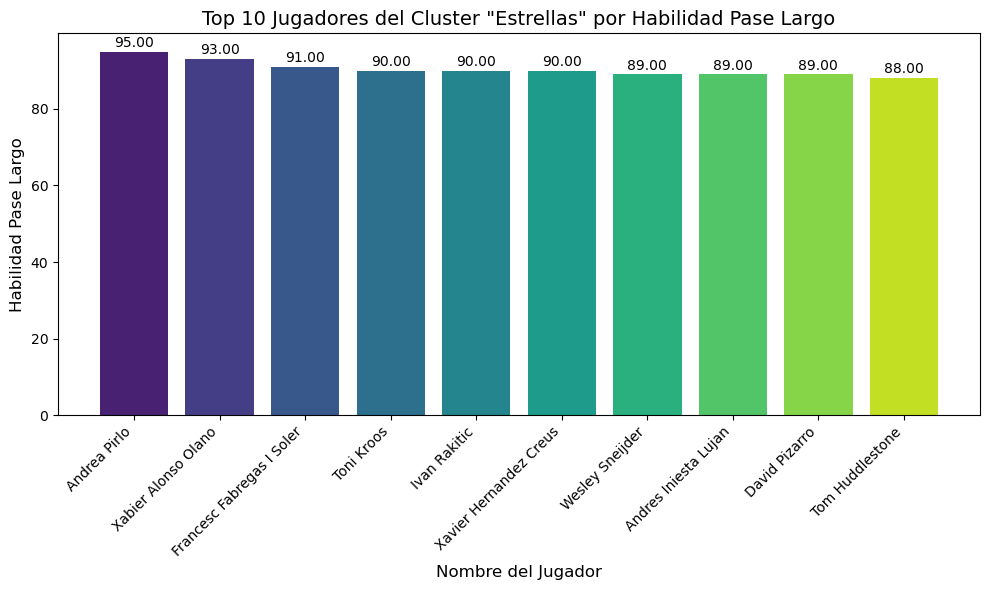

In [24]:
# Eliminar duplicados basados en la columna 'nombre_jugador', manteniendo el primero encontrado
data_filtradas = data_filtrada.drop_duplicates(subset=['nombre_jugador'])

# Asegurarnos de que no haya valores nulos en la columna 'habilidad_pase_largo' antes de ordenar
data_filtradas = data_filtradas.dropna(subset=['habilidad_pase_largo'])

# Ordenar por la estadística de habilidad_pase_largo de mayor a menor y seleccionar los 10 mejores
top_10_estrellas_pase_largo = data_filtradas.sort_values(by="habilidad_pase_largo", ascending=False).head(10)

# Crear colores con la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_estrellas_pase_largo['nombre_jugador'], top_10_estrellas_pase_largo['habilidad_pase_largo'], color=viridis_palette)

# Título del gráfico
plt.title('Top 10 Jugadores del Cluster "Estrellas" por Habilidad Pase Largo', fontsize=14)

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (valor de la estadística de habilidad_pase_largo)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posición del texto
             f'{yval:.2f}',  # Valor formateado con dos decimales
             ha='center', va='bottom', fontsize=10)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Etiquetas
plt.xlabel('Nombre del Jugador', fontsize=12)
plt.ylabel('Habilidad Pase Largo', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


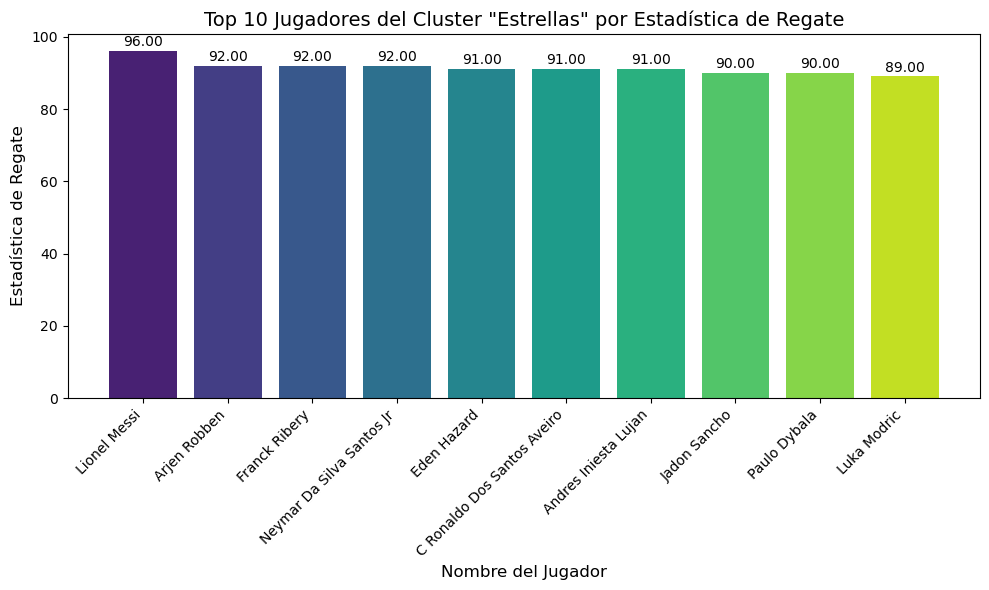

In [25]:
# Eliminar duplicados basados en la columna 'nombre_jugador', manteniendo el primero encontrado
data_filtradas = data_filtrada.drop_duplicates(subset=['nombre_jugador'])

# Asegurarnos de que no haya valores nulos en la columna 'regate' antes de ordenar
data_filtradas = data_filtradas.dropna(subset=['regate'])

# Ordenar por la estadística de regate de mayor a menor y seleccionar los 10 mejores
top_10_estrellas_regate = data_filtradas.sort_values(by="regate", ascending=False).head(10)

# Crear colores con la paleta viridis
viridis_palette = sns.color_palette('viridis', n_colors=10)

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_estrellas_regate['nombre_jugador'], top_10_estrellas_regate['regate'], color=viridis_palette)

# Título del gráfico
plt.title('Top 10 Jugadores del Cluster "Estrellas" por Estadística de Regate', fontsize=14)

# Añadir valores sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (valor de la estadística de regate)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posición del texto
             f'{yval:.2f}',  # Valor formateado con dos decimales
             ha='center', va='bottom', fontsize=10)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Etiquetas
plt.xlabel('Nombre del Jugador', fontsize=12)
plt.ylabel('Estadística de Regate', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Progresión de un jugador según uno de los atributos destacables del cluster

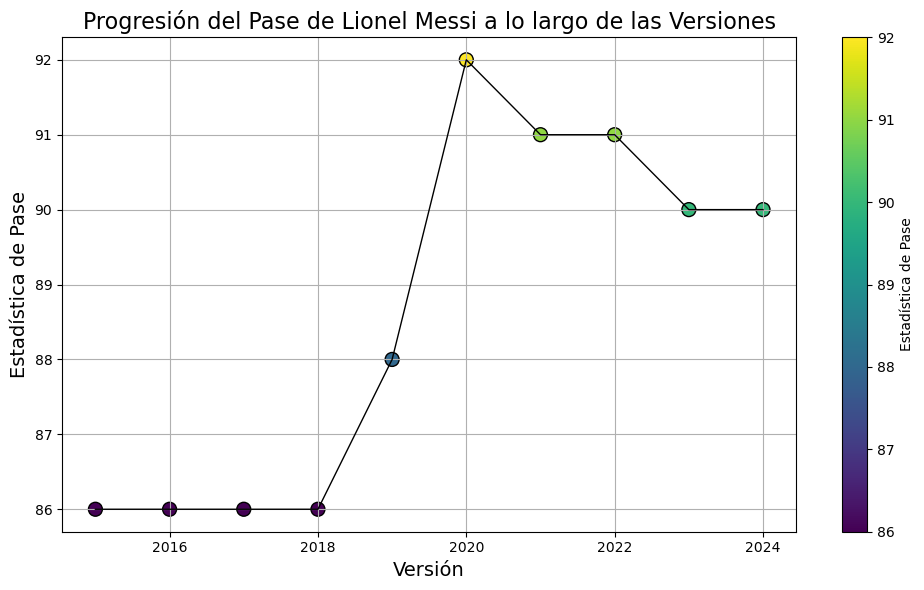

In [27]:
import matplotlib.pyplot as plt

# Filtrar los datos de Lionel Messi
data_jugador = data_filtrada.loc[data_filtrada['nombre_jugador'] == 'Lionel Messi']

# Asegurarnos de que no haya valores nulos en la columna 'pase' y 'version_x'
data_jugador = data_jugador.dropna(subset=['pase', 'version_x'])

# Ordenar los datos por versión para ver la progresión a lo largo del tiempo
data_jugador = data_jugador.sort_values(by='version_x')

# Crear un gradiente de colores con la paleta 'viridis'
norm = plt.Normalize(data_jugador['pase'].min(), data_jugador['pase'].max())
cmap = plt.get_cmap('viridis')

# Crear el gráfico de dispersión con color gradiente
plt.figure(figsize=(10,6))  # Aumentar el tamaño de la figura
sc = plt.scatter(data_jugador['version_x'], data_jugador['pase'], c=data_jugador['pase'], cmap=cmap, s=100, edgecolor='k', marker='o')

# Conectar los puntos con una línea
plt.plot(data_jugador['version_x'], data_jugador['pase'], color='k', linestyle='-', linewidth=1)

# Etiquetas y título
plt.xlabel('Versión', fontsize=14)
plt.ylabel('Estadística de Pase', fontsize=14)
plt.title('Progresión del Pase de Lionel Messi a lo largo de las Versiones', fontsize=16)

# Añadir barra de color para indicar el valor del gradiente
plt.colorbar(sc, label='Estadística de Pase')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()





## Progresión de un jugador según los atributos destacables del cluster

C:\Users\Juanma\AppData\Local\Temp\ipykernel_16508\3560016785.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


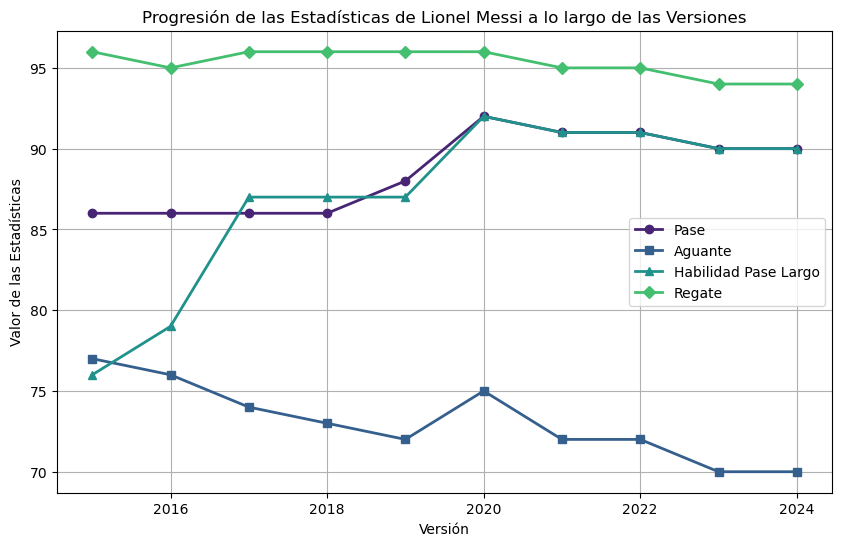

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Filtrar los datos de Lionel Messi
data_jugador = data_filtrada.loc[data_filtrada['nombre_jugador'] == 'Lionel Messi']

# Asegurarnos de que no haya valores nulos en las columnas de las estadísticas de interés
data_jugador = data_jugador.dropna(subset=['pase', 'aguante', 'habilidad_pase_largo', 'regate', 'version_x'])

# Ordenar los datos por la columna 'version_x'
data_jugador = data_jugador.sort_values(by='version_x')

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Obtener la paleta viridis
cmap = cm.get_cmap('viridis')

# Graficar cada estadística con colores de la paleta viridis
plt.plot(data_jugador['version_x'], data_jugador['pase'], marker='o', label='Pase', color=cmap(0.1), linestyle='-', linewidth=2, markersize=6)
plt.plot(data_jugador['version_x'], data_jugador['aguante'], marker='s', label='Aguante', color=cmap(0.3), linestyle='-', linewidth=2, markersize=6)
plt.plot(data_jugador['version_x'], data_jugador['habilidad_pase_largo'], marker='^', label='Habilidad Pase Largo', color=cmap(0.5), linestyle='-', linewidth=2, markersize=6)
plt.plot(data_jugador['version_x'], data_jugador['regate'], marker='D', label='Regate', color=cmap(0.7), linestyle='-', linewidth=2, markersize=6)

# Etiquetas y título
plt.xlabel('Versión')
plt.ylabel('Valor de las Estadísticas')
plt.title('Progresión de las Estadísticas de Lionel Messi a lo largo de las Versiones')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

